In [17]:
# importing all the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score as err
from sklearn.model_selection import train_test_split
from scipy.spatial import distance

In [18]:
#loading the data and making ready the global variables
df = pd.read_csv("data.csv")
x = df['x1']
y = df['x2']
z= df['x3']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=10)  # inbuilt function
x_train, x_test, z_train, z_test = train_test_split(x, z, test_size = 0.1, random_state=10)
X=x_train.tolist()
Y=y_train.tolist()

In [20]:
Xt=x_test.tolist()
Yt=y_test.tolist()


In [21]:
train_data = []
test_data = []
x_axis=[]
y_axis=[]
centers={} #ultimate optimised centroids
colors=['red','blue','yellow','green','orange','purple','pink','black']

In [22]:

for i in range(len(x_train)):
    train_data.append([X[i], Y[i]])

for i in range(len(x_test)):
    test_data.append([Xt[i], Yt[i]])

In [23]:
def random_centroids (x_train,y_train, k):
    centroids = []
    dummy = list(range(0, len(x_train)))
    cen = random.sample(dummy, k)
    for i in range(k):
        centroids.append([x_train[cen[i]],y_train[cen[i]]])

    return centroids

In [24]:
def clustering(train_data, centroids, k):
    clusters = {}
    for i in range(k):
        clusters[i] = []
    for point in train_data:
        euc_dist = []
        for j in range(k):
            dist=distance.euclidean(point,centroids[j])
            euc_dist.append(dist)
        clusters[euc_dist.index(min(euc_dist))].append(point)
    return clusters

In [25]:
def new_centroids(clusters):
    centroids=[]
    x,y=[],[]
    for i in clusters:
        for j in clusters[i]:
            x.append(j[0])
            y.append(j[1])
        centroids.append([np.mean(x),np.mean(y)])
    return centroids

In [26]:
def calc_varience(clusters,centroids):

    sum = 0
    for i in clusters:
        for j in (clusters[i]):
            sum += (distance.euclidean(j,centroids[i]))
    sum /= len(centroids)
    return sum

In [27]:
def elbow(x_axis,y_axis):
    plt.plot(x_axis,y_axis)
    plt.xlabel("Number Of Clusters ")
    plt.ylabel("Sum Of Squared Error")
    plt.title("ELBOW GRAPH")
    plt.show()

In [28]:

def plot(num):
    centroids=centers[num]
    clusters=clustering(train_data, centroids, num)
    for i in clusters:
        for j in clusters[i]:
            plt.scatter(j[0],j[1],c=colors[i])
    plt.show()

In [29]:
def error(optimum,centroids):
    test_values1 = z_test.tolist()
    test_predicted = []
    euc_dist=[]
    percentage_of_accuracy=[]
    for i in range(len(test_data)):
        for j in range(optimum):
            dist = distance.euclidean(test_data[i], centroids[j])
            euc_dist.append(dist)

        test_predicted.append(euc_dist.index(min(euc_dist)))

    for l in range(1,4):
        test_values=[i+l for i in test_values1]
        for z in test_values:
            if test_values[z]==4:
                test_values[z]=0

        percentage_of_accuracy.append(err(test_values, test_predicted))
    return max(percentage_of_accuracy)

In [30]:
def k_means(train_data):
    for k in range(2,10):
        var = []
        cent=[]
        for i in range(9):
            centroids = random_centroids(X,Y, k)

            for j in range(10):
                clusters = clustering(train_data, centroids, k)
                prev_centroids = centroids
                centroids = new_centroids(clusters)
                var.append(calc_varience(clusters,prev_centroids))
                cent.append(prev_centroids)
            centers[k]=cent[var.index(min(var))]

        y_axis.append(min(var))
        x_axis.append(k)


    elbow(x_axis,y_axis)

    chosen=int(input("Enter you preferred no of Clusters?"))
    print("The error percentage is: " + str(100*error(chosen,centers[chosen])))
    plot(chosen)  


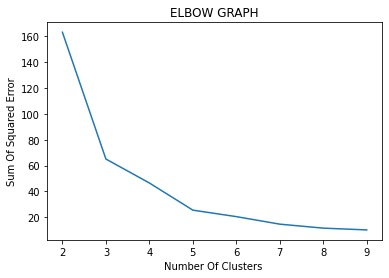

Enter you preferred no of Clusters?4
The error percentage is: 30.0


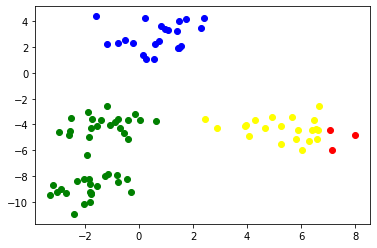

In [31]:
k_means(train_data)
